In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors

## Load and Modify Field Contours

In [2]:
base_dir = 'meta/'

df = pd.read_csv(base_dir + 'contours.csv')

In [3]:
df.rename(columns = {
        'Boundary':'Boundary-X',
        'Unnamed: 1':'Boundary-Y',
        '11100':'11100-X',
        'Unnamed: 3':'11100-Y',
        '10900':'10900-X',
        'Unnamed: 5':'10900-Y',
        '10700':'10700-X',
        'Unnamed: 7':'10700-Y',
        '10500':'10500-X',
        'Unnamed: 9':'10500-Y',
        '10300':'10300-X',
        'Unnamed: 11':'10300-Y',
        '10100':'10100-X',
        'Unnamed: 13': '10100-Y',
        '9900':'9900-X',
        'Unnamed: 15':'9900-Y'
    
}, inplace=True)

In [4]:
df.drop(index=0, inplace = True)

In [5]:
df

,Boundary-X,Boundary-Y,11100-X,11100-Y,10900-X,10900-Y,10700-X,10700-Y,10500-X,10500-Y,10300-X,10300-Y,10100-X,10100-Y,9900-X,9900-Y
1,6509.097089697676,-0.14636137560660245,2906.975733534884,691.0318001108715,3046.0049788604656,1071.8190883123318,3033.3659565581397,1349.7306135878855,3020.7269342558143,1602.3640942587892,3058.644001162791,1868.2244587344514,3260.8683580000006,2148.63439539535,3286.1464026046515,2414.347794495403
2,0.0006039999998392886,0.0006040000000666623,2616.2782205813955,738.2076856811798,2616.2782205813955,1092.100310146296,2527.805064465116,1343.8519985635482,2692.112354395349,1598.54299449297,2565.7221313720934,1774.0196529694433,3033.3659565581397,2095.4329294250947,3197.6732464883726,2425.95805916847
3,0.0006039999998392886,5396.863127093022,2477.248975255814,825.0642226657658,2426.692886046512,1140.4519187214712,2439.3319083488377,1342.8232409342888,2464.6099529534886,1570.6195731273663,2401.414841441861,1759.470080784208,2654.1952874883723,2002.5508120405632,3134.4781349767445,2501.057366104382
4,7583.413985395349,5396.569196341808,2312.9416853255816,936.9048735037863,2211.829506906977,1226.4266634524072,2022.244172372093,1514.9196957717688,2300.302663023256,1568.7090232444564,2300.302663023256,1783.5724023839914,2477.248975255814,1987.8542744797194,3109.2000903720937,2614.5146360740946
5,NaN,NaN,2060.16123927907,1035.077744410222,1984.3271054651163,1350.171509714711,1946.41003855814,1627.7891042390481,2161.2734176976746,1630.287515624392,2237.1075515116286,1858.671709319903,2439.3319083488377,2037.969467562196,3248.2293356976743,2679.326366717415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,NaN,NaN,NaN,4651.160811255814,964.0934679913478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,4322.546231395349,960.2723682255285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,3690.5951162790698,1028.7582332590598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,3463.09271483721,1051.3909011027592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def denan(data):
    data = np.array(data, dtype = np.float64)*3.28084
    return data[np.logical_not(np.isnan(data))]

In [7]:
xb = denan(df['Boundary-X'])
yb = denan(df['Boundary-Y'])
x11100 = denan(df['11100-X'])
y11100 = denan(df['11100-Y'])
x10900 = denan(df['10900-X'])
y10900 = denan(df['10900-Y'])
x10700 = denan(df['10700-X'])
y10700 = denan(df['10700-Y'])
x10500 = denan(df['10500-X'])
y10500 = denan(df['10500-Y'])
x10300 = denan(df['10300-X'])
y10300 = denan(df['10300-Y'])
x10100 = denan(df['10100-X'])
y10100 = denan(df['10100-Y'])
x9900 = denan(df['9900-X'])
y9900 = denan(df['9900-Y'])

In [8]:
faults = pd.read_csv(base_dir + 'faults.csv')
fault1X = np.array([faults['X'][0], faults['X'][1]])
fault1Y = np.array([faults['Y'][0], faults['Y'][1]])
fault2X = np.array([faults['X'][2], faults['X'][3]])
fault2Y = np.array([faults['Y'][2], faults['Y'][3]])

## Load and Modify Wells Data

In [11]:
wells_pos = pd.read_csv(base_dir + 'Wells.csv')
wells_pos*3.28084

,X,Y
0,10656.920734,10241.772465
1,9869.055145,11974.208854
2,13891.316308,11689.246453
3,7381.058549,6264.353100
4,12896.117670,6535.814744
5,10532.520904,7213.263430


In [12]:
xp = np.array([wells_pos['X'][1],wells_pos['X'][4]])*3.28084
yp = np.array([wells_pos['Y'][1],wells_pos['Y'][4]])*3.28084

In [13]:
k = (yp[0] - yp[1])/(xp[0] - xp[1])

b = yp[1] - k*xp[1]
b

xe = (0 - b)/k
b

29704.867181505084

## Plotting 2D contour Map

<b> * This will be the basis for our 3D model</b>

<IPython.core.display.Javascript object>


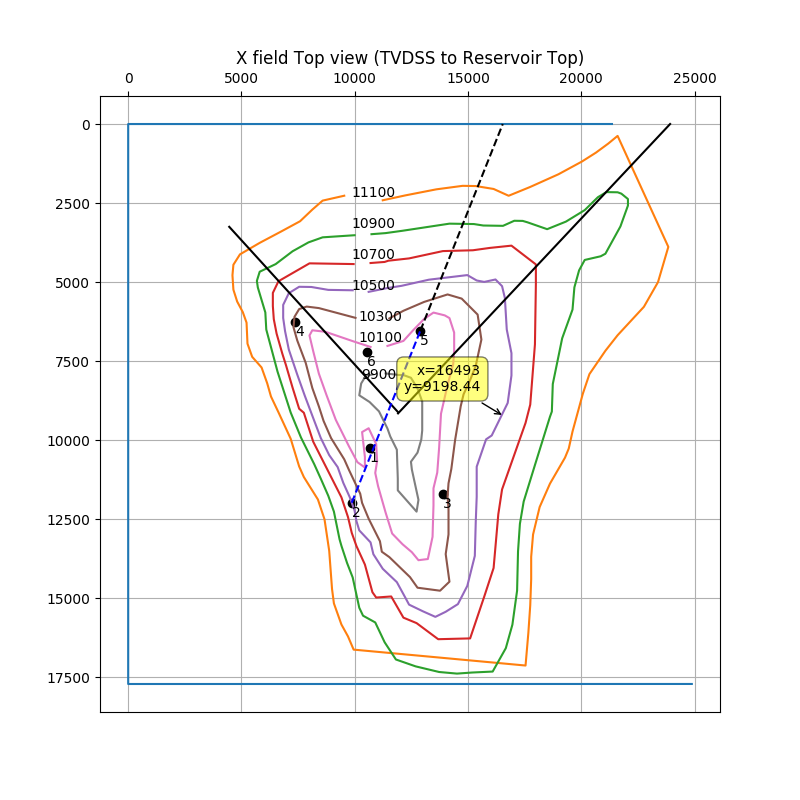

In [14]:
%matplotlib notebook
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(111)

ax.plot(xb, yb)
ax.plot(x11100, y11100)
ax.annotate('11100', xy = (9842.52, 2296.588), size = 10)
ax.plot(x10900, y10900)
ax.annotate('10900', xy = (9842.52, 3280.84), size = 10)
ax.plot(x10700, y10700)
ax.annotate('10700', xy = (9842.52, 4265.092), size = 10)
ax.plot(x10500, y10500)
ax.annotate('10500', xy = (9842.52, 5249.344), size = 10)
ax.plot(x10300, y10300)
ax.annotate('10300', xy = (10170.604, 6233.596), size = 10)
ax.plot(x10100, y10100)
ax.annotate('10100', xy = (10170.604, 6889.764), size = 10)
ax.plot(x9900, y9900)
ax.annotate('9900', xy = (10301.8376, 8070.8664), size = 10)
ax.invert_yaxis()
ax.xaxis.tick_top()

for i in range(len(wells_pos)):
    x = np.array(wells_pos['X'])[i] * 3.28084
    y = np.array(wells_pos['Y'])[i] * 3.28084
    
    ax.scatter(x, y, c = 'k')
    ax.annotate('{}'.format(i+1), xy = (x, y+450), size = 10)
ax.plot(fault1X,fault1Y, c = 'k')
ax.plot(fault2X,fault2Y, c = 'k')

ax.set_title("X field Top view (TVDSS to Reservoir Top)")
ax.grid(True)


ax.plot(np.array([wells_pos['X'][1],wells_pos['X'][4]])*3.28084,
        np.array([wells_pos['Y'][1],wells_pos['Y'][4]])*3.28084, c = 'b', ls = '--')
ax.plot(np.array([wells_pos['X'][4]*3.28084, 16534.015086930507]), np.array([wells_pos['Y'][4]*3.28084,0]), c = 'k', ls = '--')
mplcursors.cursor(hover = True)

## Plotting 3D Contour Map

In [15]:
x = np.concatenate([x9900, x10100, x10300, x10500, x10700, x10900, x11100])
y = np.concatenate([y9900, y10100, y10300, y10500, y10700, y10900, y11100])
Z = np.concatenate([np.ones(len(x9900))*9900, np.ones(len(x10100))*10100, np.ones(len(x10300))*10300
                    ,np.ones(len(x10500))*10500, np.ones(len(x10700))*10700, np.ones(len(x10900))*10900
                    , np.ones(len(x11100))*11100])
data = {
    'x':x,
    'y':y,
    'Z':Z
}
contours = pd.DataFrame(data)

coords = contours[['x', 'y', 'Z']].values


### Loading Well Trajectory Data as well

In [16]:
#Helper Functions

def transfrom2well(dataX, dataY, wellX, wellY):
    """Center the deviation data to the well location"""
    transform = {
        'x': wellX + dataX,
        'y': wellY + dataY
    }
    
    return transform

X5trajectory = pd.read_csv('tutorial/X5_directional.csv')

trf = transfrom2well(X5trajectory['X DEV'], X5trajectory['Y DEV'],
                                                  wells_pos['X'][2]*3.28084,wells_pos['Y'][2]*3.28084)

X5trajectory['X DEV'] = trf['x']
X5trajectory['Y DEV'] = trf['y']

In [17]:
X5trajectory

,X DEV,Y DEV,DEPTH,TVD
0,13915.849208,11712.531483,10000.000320,9431.16797
1,13915.970238,11712.648513,10000.500320,9431.63867
2,13916.091228,11712.765563,10001.000320,9432.10938
3,13916.212178,11712.882643,10001.500320,9432.58105
4,13916.333098,11712.999743,10002.000320,9433.05176
...,...,...,...,...
3708,14348.619838,12190.315823,11854.000379,11167.18945
3709,14348.752188,12190.452903,11854.500379,11167.65234
3710,14348.884548,12190.589963,11855.000379,11168.11426
3711,14349.016898,12190.727013,11855.500379,11168.57715


In [18]:
traj_coords = X5trajectory[['X DEV', 'Y DEV', 'TVD']].values

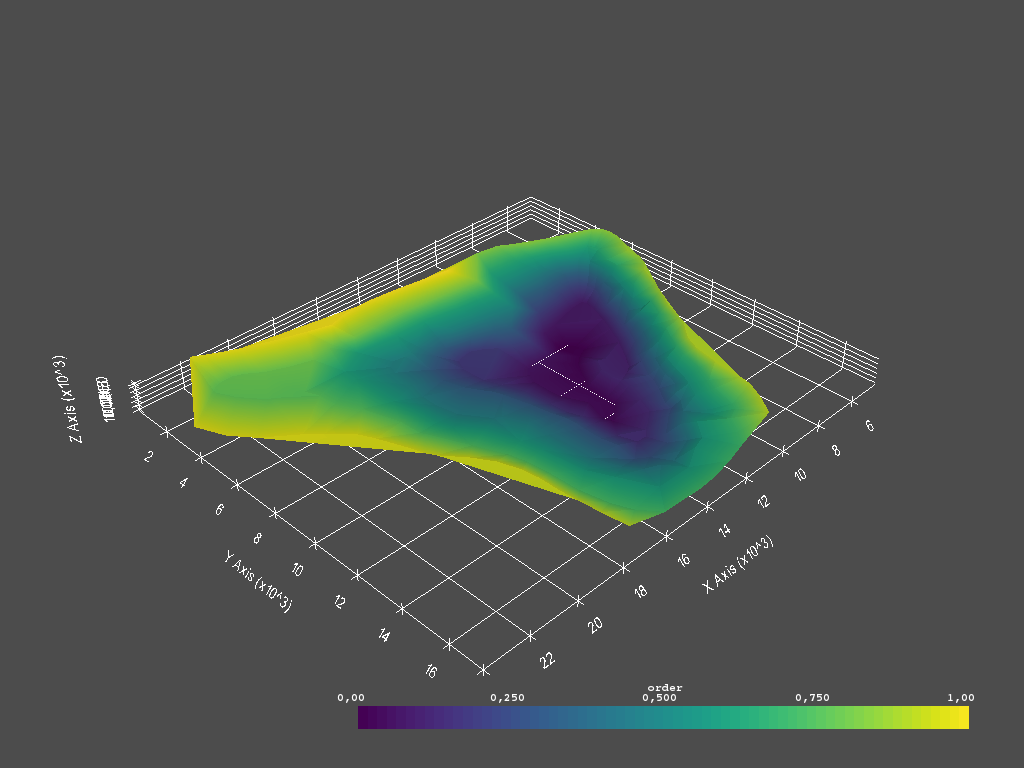

In [20]:
import pyvista as pv

def lines_from_points(points):
    poly = pv.PolyData()
    poly.points = points
    
    cells = np.full(((len(points)-1),3), 2, dtype = np.int)
    cells[:, 1] = np.arange(0, len(points)-1, dtype=np.int)
    cells[:, 2] = np.arange(1, len(points), dtype=np.int)
    
    poly.lines = cells
    
    return poly
    
line = lines_from_points(traj_coords)
tube = line.tube(radius = 100)

coords = contours[['x', 'y', 'Z']].values
traj_coords = X5trajectory[['X DEV', 'Y DEV', 'DEPTH']].values


poly = pv.PolyData(coords)
poly['order'] = np.linspace(0,1,poly.n_points)

#Create Basis Plotter
plotter = pv.BackgroundPlotter()
plotter.set_scale(1,1,4.5)

#Creating the Mesh from data
surf = poly.delaunay_2d()
surf.plot(notebook = True, show_grid = True)

#Adding mesh to basis plot
plotter.add_mesh(surf, opacity = 0.5)
plotter.add_mesh(tube, color = 'black')
plotter.show_grid()